# Title: Credit Card Fraud DetectionON

### 1. Understanding the Problem

* `Objective`: Build a model to detect fraudulent credit card transactions. Use a dataset containing information about credit card transactions, and experiment with algorithms like Logistic Regression, Decision Trees, or Random Forests to classify transactions as fraudulent or legitimate.

### 2. Setting Up the Environment

`Tools Needed:`
* Install Python libraries: pandas, numpy, matplotlib, seaborn, sklearn.
* Use Jupyter Notebook or an IDE (like PyCharm or VS Code).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Loading the Dataset

 * Use publicly available datasets, such as the Kaggle Credit Card Fraud Detection Dataset.


In [3]:
df = pd.read_csv(r"C:\Machine Learning\codesoft\CREDIT_CARD_FRAUD _DETECTION_ML2\fraudTrain.csv\fraudTrain.csv", index_col=0)

In [4]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### 4. Exploratory Data Analysis (EDA)

In [6]:
# Basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [7]:
# Check for missing values
print(df.isnull().sum())

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [8]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
# View class distribution
print(df['is_fraud'].value_counts())
print("*"*50)
# Calculate class proportions
fraud_percentage = (df['is_fraud'].value_counts(normalize=True) * 100)
print(fraud_percentage)

is_fraud
0    1289169
1       7506
Name: count, dtype: int64
**************************************************
is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64


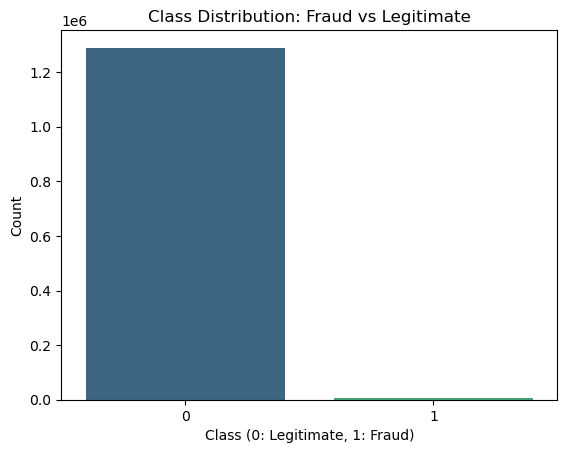

In [11]:
# Visualize class imbalance
sns.countplot(x='is_fraud', data=df, hue='is_fraud', palette='viridis', legend=False)
plt.title('Class Distribution: Fraud vs Legitimate')
plt.xlabel('Class (0: Legitimate, 1: Fraud)')
plt.ylabel('Count')
plt.show()

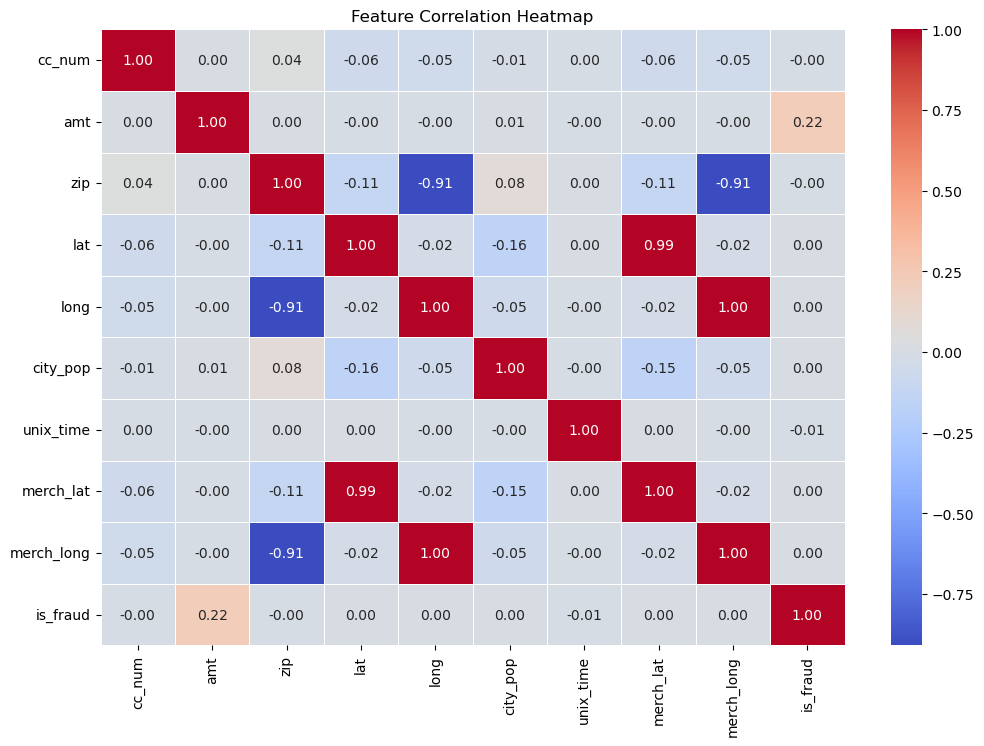

In [12]:
 # Feature Correlation Heatmap
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


### 5. Data Preprocessing

* 1. `Normalize the amt Feature`
We scale the transaction amounts (amt) using StandardScaler for better performance in machine learning models. This ensures the feature values have a mean of 0 and standard deviation of 1.

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the 'amt' feature
df['amt'] = scaler.fit_transform(df[['amt']])

In [18]:
df['amt']

0         -0.407826
1          0.230039
2          0.934149
3         -0.158132
4         -0.177094
             ...   
1296670   -0.341769
1296671   -0.116339
1296672    0.221930
1296673    0.028375
1296674   -0.412005
Name: amt, Length: 1296675, dtype: float64

* 2. `Handle Dates and Timestamps`
The trans_date_trans_time and unix_time columns can provide valuable insights. You can extract useful features like hour, day, month, etc.

In [25]:
# Convert 'trans_date_trans_time' to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract useful features from the datetime column
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek

# Drop the original datetime column if not needed
df = df.drop(columns=['trans_date_trans_time', 'unix_time'])

In [27]:
# df.head(3)

* 3. `Drop Unnecessary Columns`
Remove columns that are unlikely to contribute to predicting fraud, such as personal identifiers (first, last, street, dob, trans_num, etc.).

In [33]:
df = df.drop(columns=['cc_num', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'])


* 4. `Encode Categorical Variables`
Convert the merchant and category columns into numerical representations using one-hot encoding.

In [36]:
# One-hot encode 'merchant' and 'category'
df = pd.get_dummies(df, columns=['merchant', 'category'], drop_first=True)

In [37]:
# df.head(2)

* 5. `Define Features and Target`
Separate the independent features (X) and the target variable (is_fraud).

In [41]:
# Features and target
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

* 6. `Train-Test Split`
Split the dataset into training and testing sets to evaluate model performance.

In [44]:
from sklearn.model_selection import train_test_split

# Stratified split to ensure balanced classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42, stratify=y)

### 6. Building and Training Models

#### LogisticRegression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features to normalize the data (recommended for Logistic Regression)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
model_lr = LogisticRegression(max_iter=1000, random_state=42)  # random_state for reproducibility

# Train the model
model_lr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9936979839461186
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    773501
           1       0.03      0.00      0.01      4504

    accuracy                           0.99    778005
   macro avg       0.51      0.50      0.50    778005
weighted avg       0.99      0.99      0.99    778005



In [ ]:
# DecisionTree

In [57]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)

# Train the model
model_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = model_dt.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9965925668858169
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    773501
           1       0.70      0.71      0.71      4504

    accuracy                           1.00    778005
   macro avg       0.85      0.85      0.85    778005
weighted avg       1.00      1.00      1.00    778005



# Random Forest model

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9971516892564958
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    773501
           1       0.96      0.53      0.68      4504

    accuracy                           1.00    778005
   macro avg       0.98      0.76      0.84    778005
weighted avg       1.00      1.00      1.00    778005



###  **Model Evaluation (Common for all Models)**
For all models, it's crucial to evaluate their performance using several metrics. Here's a consolidated block of code to assess accuracy, precision, recall, F1-score, and the confusion matrix:

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print classification report for each model
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("*"* 100)
# Print confusion matrix for each model
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    773501
           1       0.03      0.00      0.01      4504

    accuracy                           0.99    778005
   macro avg       0.51      0.50      0.50    778005
weighted avg       0.99      0.99      0.99    778005

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    773501
           1       0.70      0.71      0.71      4504

    accuracy                           1.00    778005
   macro avg       0.85      0.85      0.85    778005
weighted avg       1.00      1.00      1.00    778005

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    773501
           1       0.96      0.53      0.68      4504

    accuracy                           1.00    778005
   macro

# Conclusion:
`Random Forest` is the most effective model for detecting fraudulent transactions, with the highest accuracy (`99.72%`) and a strong balance between precision (`96%`) and recall (`53%`). It outperforms both Logistic Regression, which is **inadequate for fraud detection, and Decision Tree**, which performs reasonably well but lacks the overall reliability of `Random Forest`.